<a href="https://colab.research.google.com/github/aschelin/Dengue/blob/main/dados_dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://raw.githubusercontent.com/aschelin/Dengue/main/BannersDengue.png" height="200px"></p>

In this project we analyze data concerning **dengue cases** in the Federal District of Brazil. 

Among the various health problems that affect Brazil and, particularly the central west, Dengue stands out as one of the main challenges to be overcome. According to data from the World Health Organization (WHO), 2/5 of the world population is subjected to contracting the disease. 

Each year, *50 million* new cases occur. Of these, about half a million people are hospitalized and 20,000 die. In general, the clinical picture of the infection is diverse, ranging from **asymptomatic to severe hemorrhagic fever**.

The dengue virus is transmitted by arthropods that include four different serotypes (DEN-1, DEN-2, DEN-3 and DEN-4). **It enters the host organism through the skin after an infected mosquito bite**. Transmission between humans occurs by the Aedes aegypti mosquito and occurs mainly during the rainy season.

**The contagion dynamics of dengue is associated with climatic variations**. We can mention some factors that contribute to the development of the vector: the increase in temperature, variations in precipitation and relative humidity. There are two stages in the development of the vector: the aquatic, with stages of development of egg, larva and pupa, and the terrestrial, which corresponds to the adult mosquito. Both stages are subject to environmental and meteorological changes.

In Brazil, dengue appeared between 1981 and 1982, in the city of Boa Vista, State of Roraima. Since then, the country has recorded several epidemic outbreaks. Currently, it is already possible to find Aedes aegypti in the 27 federal units, with more than 3,587 municipalities infested by the vector of the disease. **Dengue, therefore, has been an important cause of mortality in recent decade**s.

In [49]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [50]:
data_path = "https://raw.githubusercontent.com/aschelin/Dengue/main/dadosdengue.csv"
df = pd.read_csv(data_path,sep=';',header=None)

# Preparing the data

In [51]:
df.drop(columns=0,inplace=True)


In [52]:
df = df.T
dfnew = df[0]
for i in df.columns[1:]:
  dfnew = dfnew.append(df[i], ignore_index=True)

In [53]:
df_dengue = pd.DataFrame(dfnew)
df_dengue['Time']=pd.date_range(start='2014-01-01', end='2021-01-01', periods=371)
df_dengue.set_index('Time',drop=True, inplace=True)
df_dengue.head()

,0
Time,
2014-01-01 00:00:00.000000000,87
2014-01-07 21:51:34.054054054,148
2014-01-14 19:43:08.108108108,193
2014-01-21 17:34:42.162162162,181
2014-01-28 15:26:16.216216216,205


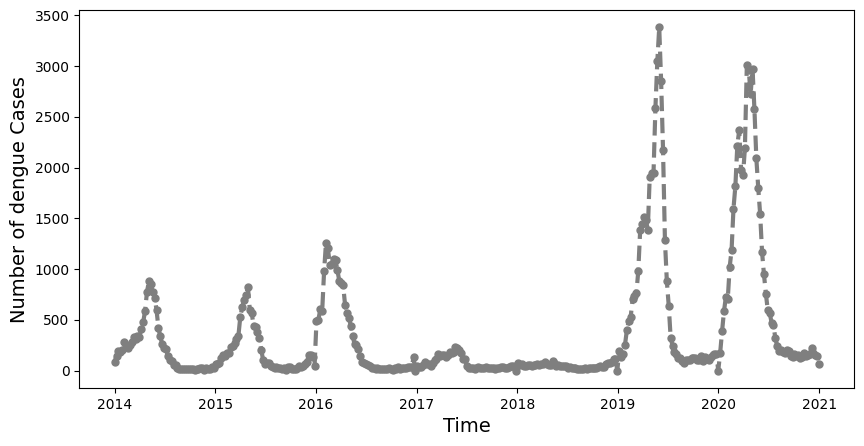

In [54]:
   fig, (ax1) = plt.subplots(1,figsize=(10,5),dpi=100)
   ax1.plot(df_dengue[0],marker='o', linestyle='--',    linewidth=3,markersize=5, color='tab:gray')
   maxi=round(df_dengue[0].max()+100);
   ax1.set_ylabel('Number of dengue Cases',fontsize=14);
   ax1.set_xlabel('Time',fontsize=14);

To analyze our data we use the Prophet framework.

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

### Preparing the data for Prophet


In [56]:
# trabalhar com dados diários
prophet_df = df_dengue.reset_index().rename(columns={'Time':'ds', 0:'y'})

# ver as 5 primeiras entradas
prophet_df.head()

,ds,y
0,2014-01-01 00:00:00.000000000,87
1,2014-01-07 21:51:34.054054054,148
2,2014-01-14 19:43:08.108108108,193
3,2014-01-21 17:34:42.162162162,181
4,2014-01-28 15:26:16.216216216,205


### Creating a Forecasting Model

In [42]:
# instanciar e treinar o modelo
model2 = Prophet()
model2.fit(prophet_df)

# determinar o período de dias para previsão
future2 = model2.make_future_dataframe(periods=52,freq='W')

# realizar a previsão para o período estabelecido
forecast2 = model2.predict(future2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


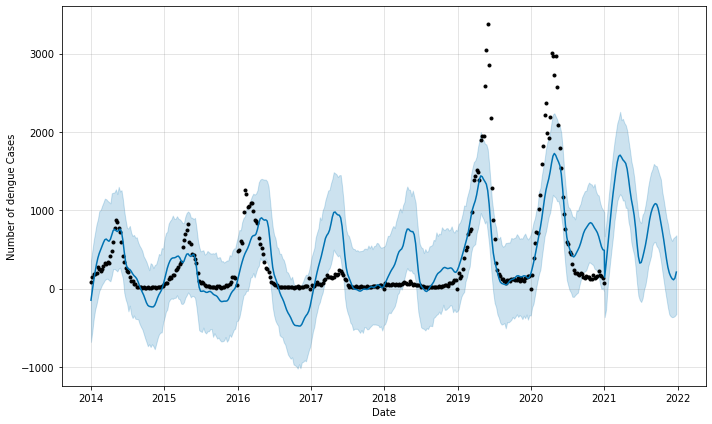

In [47]:
# visualizar o gráfico com as previsões
model2.plot(forecast2, xlabel='Date', ylabel='Number of dengue Cases');

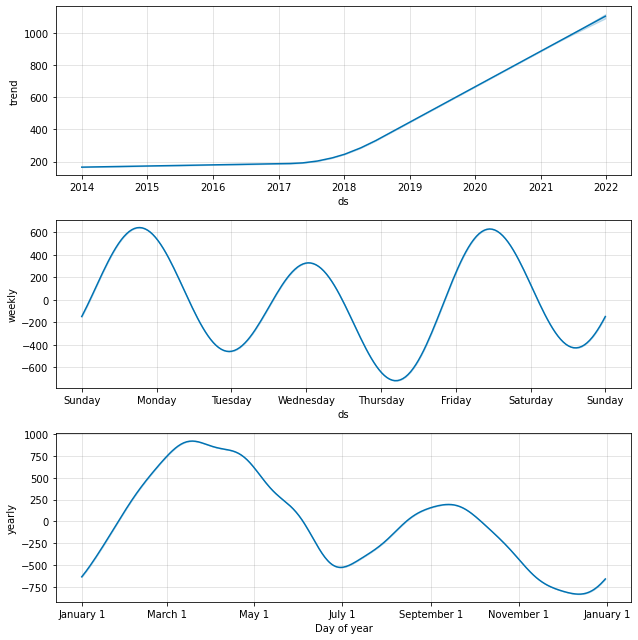

In [31]:
model2.plot_components(forecast2);

# Using multiplicative seasonality mode:

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


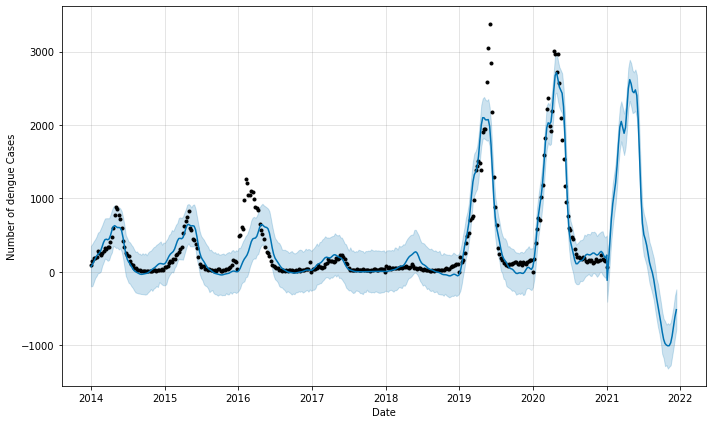

In [64]:
m = Prophet(seasonality_mode='multiplicative').fit(prophet_df)
future = m.make_future_dataframe(periods=50,freq='W')
fcst = m.predict(future)
fig = m.plot(fcst, xlabel='Date', ylabel='Number of dengue Cases')

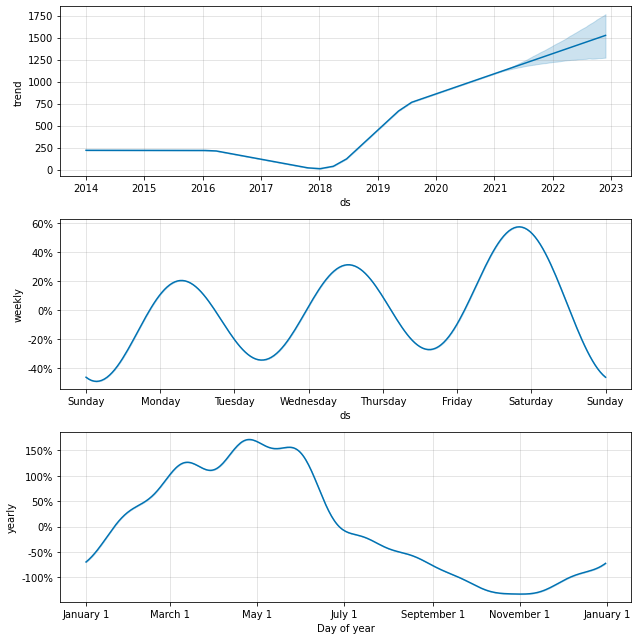

In [44]:
m.plot_components(fcst);

# Cross Validation

In [62]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon = '50 days')
df_cv.head()

INFO:fbprophet:Making 86 forecasts with cutoffs between 2015-01-18 00:00:00 and 2020-11-12 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-23 00:07:47.027027024,70.717790,53.363110,87.916504,120,2015-01-18
1,2015-01-29 21:59:21.081081080,71.753718,53.830948,88.477920,153,2015-01-18
2,2015-02-05 19:50:55.135135132,70.668180,53.776634,88.094080,139,2015-01-18
3,2015-02-12 17:42:29.189189184,65.631355,48.179324,84.025760,176,2015-01-18
4,2015-02-19 15:34:03.243243240,57.982911,40.829410,75.747020,174,2015-01-18


In [63]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,5 days 00:07:47.027027024,144515.215307,380.151569,224.064350,0.885682,0.419355
1,5 days 00:50:35.675675664,144908.706084,380.668762,225.065708,0.923686,0.419355
2,5 days 01:33:24.324324320,151630.145075,389.397156,235.333635,0.954258,0.403226
3,5 days 05:26:55.135135136,152543.006147,390.567544,238.854952,0.962902,0.387097
4,5 days 06:09:43.783783776,152427.609169,390.419786,238.029922,0.962442,0.387097
